# Laboratório de Processamento de Sinais para Comunicações
##  Prárica 01 - Amostragem

### Aluno - Matrícula:

Ezequias Márcio Silva de Santana Júnior - 371887

In [1]:
# Importando os módulos necessários para a execução do código.
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline


In [2]:
# Funções implementadas para a recureção:
def rec_zero_order(sampled, time):
    """
    Função que implementa a interpolação de ordem zero, utilizando um filtro de interpolação
    retangular.
    """
    def rect(x):
        """
        Função da resposta ao impulso do filtro retangular.
        """
        if abs(x) > 0.5:
            return 0
        elif abs(x) < 0.5:
            return 1
        else:
            return 0.5
    
    # Período de amostragem:
    Ts = 1/(sampled.size - 1)
    
    # Variável que recebe o sinal recuperado:
    zero_order = np.zeros(time.size)
    
    # Convolução:
    for t in range(time.size):
        soma = 0
        for n in range(sampled.size):
            soma += rect((time[t] - 0.5*Ts - n*Ts)/Ts)*sampled[n]
        zero_order[t] = soma
    
    return zero_order


def rec_linear_interp(sampled, time):
    """
    Função que implementa recuperação do sinal via interpolação linear 1D.
    """
    
#     rec_lin = np.zeros(sr)
#     for t in range(sr):
#         for i in range(len(sampled)-1):
#             if time[t] > ts[i] and time[t] < ts[i+1]:
#                 rec_lin[t] = sampled[i] + (time[t] - ts[i])*\
#                          (sampled[i+1] - sampled[i])/(ts[i+1] - ts[i])
    
    ts = np.linspace(min(time), max(time), sampled.size)
    
    return np.interp(time, ts, sampled) # return rec_lin


def rec_ideal_interp(sampled, time):
    """
    Função que implementa a interpolação ideal, utilizando um filtro de interpolação
    sinc.
    """
    # Período de amostragem:
    Ts = 1/(sampled.size - 1)
    
    # Variável que recebe o sinal recuperado:
    ideal = np.zeros(time.size)
    
    # Convolução:
    for t in range(time.size):
        soma = 0
        for n in range(sampled.size):
            soma += np.sinc((time[t]  - n*Ts)/Ts)*sampled[n]
        ideal[t] = soma
    
    return ideal


### Plotando sinal:

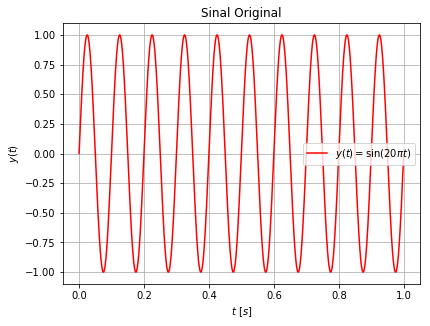

In [3]:
# Definindo sample rate global em 3.2k amostras em 1 segundo, simulando sinal o contínuo:
sr = 3200 # 3.2kHz

# Valores de t in [0, 1] segundos:
time = np.linspace(0, 1, sr)

# Construção do sinal:
freq = 10 # Hz
signal = np.sin(2*np.pi*freq*time)

# Plotando a curva:
dim = 1*6.4                                          # Dimensões da figura (múltiplos de 6.4)
plt.figure('analog_signal', figsize=[dim, 0.75*dim]) # Inicializando figura
plt.title('Sinal Original')                          #
plt.xlabel('$t$ [$s$]')                              # Título, eixos
plt.ylabel('$y(t)$')                                 #
plt.plot(time, signal, 'r', label='$y(t) = \sin(20\pi t)$') # plot
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura


bits: 2, variavel: 3, níveis 4
0.9987165071710529 0.24967912679276322
[ 0.          1.          1.          0.         -0.66666667 -1.
 -0.33333333  0.66666667  1.          0.33333333 -0.66666667 -1.
 -0.33333333  0.66666667  1.          0.33333333 -0.33333333 -1.
 -0.66666667  0.33333333  1.          0.66666667 -0.33333333 -1.
 -0.66666667  0.33333333  1.          0.66666667 -0.         -1.
 -1.         -0.          1.          1.          0.         -0.66666667
 -1.         -0.33333333  0.66666667  1.          0.33333333 -0.66666667
 -1.         -0.33333333  0.66666667  1.          0.33333333 -0.33333333
 -1.         -0.66666667  0.33333333  1.          0.66666667 -0.33333333
 -1.         -0.66666667  0.33333333  1.          0.66666667 -0.
 -1.         -1.         -0.        ]
eqm quantização 0.007754784758748097


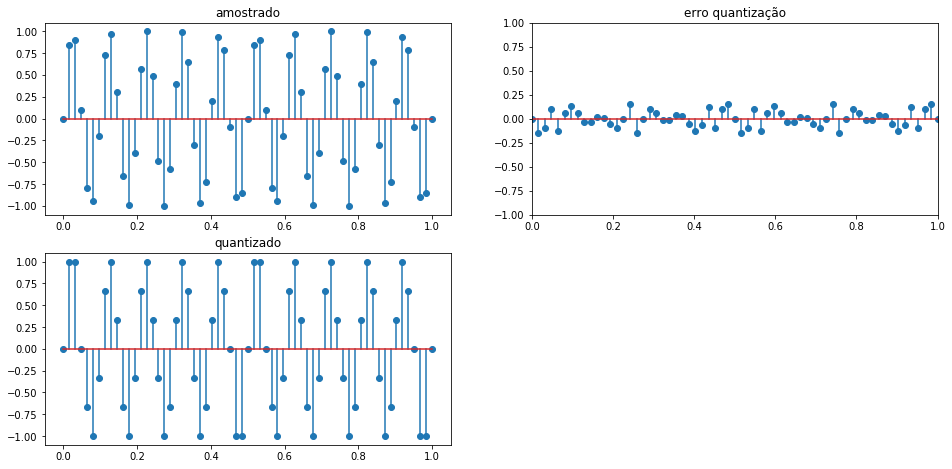

In [76]:
b = 2
v = 2**b - 1

print('bits: {}, variavel: {}, níveis {}'.format(b, v, v+1))

sinal_quantizado = np.rint(samp_signal*v)*1/v

print(max(samp_signal), max(samp_signal)/2**b)

plt.figure(figsize=[dim, dim*0.75])
plt.subplot(3, 2, 3)
plt.title('quantizado')
plt.stem(ts, sinal_quantizado)
plt.subplot(3, 2, 2)
plt.title('erro quantização')
plt.stem(ts, samp_signal - sinal_quantizado)
plt.axis([0, 1, -1, 1])
plt.subplot(3, 2, 1)
plt.title('amostrado')
plt.stem(ts, samp_signal)

print(sinal_quantizado)

for i in range(samp_signal.size):
    if abs(samp_signal[i] - sinal_quantizado[i]) > max(samp_signal)/2**b:
        print(samp_signal[5] - sinal_quantizado[5])
        
print('eqm quantização', np.mean((samp_signal - sinal_quantizado)**2))

8

### Amostragem:

In [32]:
# Amostrador Iterativo
def sampler(sample_freq):
    
    dim = 1.25*6.4
    plt.figure('sampled_signal', figsize=[dim, 0.75*dim])
    plt.plot(time, signal, 'r:')
    
    # Uso do arange: anda n vezes o passo e amostra n+1 vezes, ou seja fs = fs+1
    # ts = np.arange(0, 1 + 1/sample_freq, 1/sample_freq) # passo = 1/fs 
    ts = np.linspace(0, 1, sample_freq)
    samp_signal = np.sin(2*np.pi*freq*ts)
    plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='C0o', basefmt='k-')
    
    
    plt.title('Sinal Amostrado @ $f_s$ {}Hz'.format(sample_freq))
    plt.xlabel('$t$ [$s$]')
    plt.ylabel('Amplitude') 
    plt.plot(time, signal, 'r--', label='$y(t)$')
    
    plt.grid()
    plt.show('sampled_signal')
    
    # ------------------------------------------------------------------------------------------
    
    # Recuperando o sinal:
    signal_zero_ord = rec_zero_order(samp_signal, time)
    signal_linear = rec_linear_interp(samp_signal, time)
    signal_ideal = rec_ideal_interp(samp_signal, time)

    # Cálculo e armazenamento do MSE em um vetor:
    erro = np.zeros((3, sr))
    erro[0] = signal - signal_zero_ord
    erro[1] = signal - signal_linear
    erro[2] = signal - signal_ideal

    mse = np.array([np.mean(erro[i,:]**2) for i in range(3)])
    print(mse)
    
    # ------------------------------------------------------------------------------------------
    
    dim = 2.5*6.4 
    fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', num='results', figsize=[dim, 0.75*dim])

    # Parâmetros do texto:
    style = dict(size=13, color='black')

    # Plots:
    ax[0, 0].plot(time, signal_zero_ord, 'k-', label='$ŷ_{zero}(t)$')
    ax[0, 0].plot(time, signal, 'C3--', label='$y(t)$')
    ax[0, 0].grid()

    ax[0, 1].plot(time, erro[0], 'C4-', label='y(t) - $ŷ_{zero}(t)$')
    ax[0, 1].text(0.2, -0.75, 'Mean Square Error: {:.4f}'.format(mse[0]), **style)
    ax[0, 1].grid()

    ax[1, 0].plot(time, signal_linear, 'k-', label='$ŷ_{linear}(t)$')
    ax[1, 0].plot(time, signal, 'C3--', label='$y(t)$')
    ax[1, 0].grid()

    ax[1, 1].plot(time, erro[1], 'C4-', label='y(t) - $ŷ_{linear}(t)$')
    ax[1, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[1]), **style)
    ax[1, 1].grid()

    ax[2, 0].plot(time, signal_ideal, 'k-', label='y(t) - $ŷ_{sinc}(t)$')
    ax[2, 0].plot(time, signal, 'C3--', label='$y(t)$')
    ax[2, 0].grid()

    ax[2, 1].plot(time, erro[2], 'C4-', label='y(t) - $ŷ_{sinc}(t)$')
    ax[2, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[2]), **style)
    ax[2, 1].grid()

    # Textos e legendas:
    ax[0, 0].set_title('Sinal Recuperado ŷ(t)')
    ax[0, 1].set_title('Erro')

    for i in range(3):
        ax[i, 0].set_ylabel('Amplitude')

    ax[2, 0].set_xlabel('$t$ [$s$]')
    ax[2, 1].set_xlabel('$t$ [$s$]')

    ax[0, 0].legend(loc='lower left')
    ax[1, 0].legend(loc='lower left')
    ax[2, 0].legend(loc='best')
    ax[0, 1].legend()
    ax[1, 1].legend()
    ax[2, 1].legend()

    plt.show('resuls')
    
    return samp_signal

w2 = widgets.interactive(sampler, sample_freq=[4, 8, 12, 26, 51, 64])#(9, 65, 1))
display(w2)
# ? da pra fazer tudo iterativo ?

interactive(children=(Dropdown(description='sample_freq', options=(4, 8, 12, 26, 51, 64), value=4), Output()),…

In [27]:
# Salvando resultados
samp_signal = w2.result
print(samp_signal.size)

12


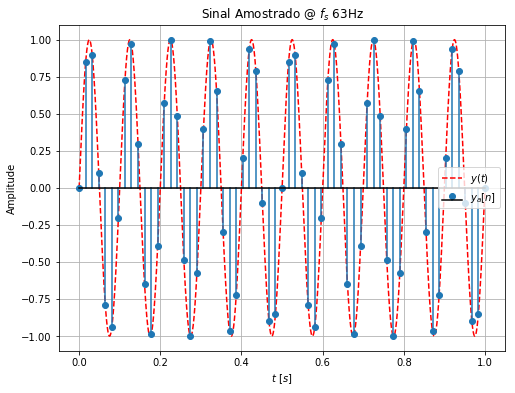

In [28]:
# Definindo frequência de amostragem:                      Nyquist: 62.83185307179586 (2*pi*10)
sample_freq = 63 #Hz

# Instantes de tempo em que o sinal é amostrado:
ts = np.linspace(0, 1, sample_freq)

# Amostras do sinal
samp_signal = np.sin(2*np.pi*freq*ts)

# Plotagem do sinal amostrado e original
dim = 1.25*6.4 
plt.figure('sampled_signal', figsize=[dim, 0.75*dim])
plt.title('Sinal Amostrado @ $f_s$ {}Hz'.format(sample_freq))
plt.xlabel('$t$ [$s$]')
plt.ylabel('Amplitude') 
plt.plot(time, signal, 'r--', label='$y(t)$')
plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='C0o', basefmt='k-', label='$y_a[n]$')
plt.stem
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura


### Recuperação:

In [29]:
# Recuperando o sinal:
signal_zero_ord = rec_zero_order(samp_signal, time)
signal_linear = rec_linear_interp(samp_signal, time)
signal_ideal = rec_ideal_interp(samp_signal, time)

# Cálculo e armazenamento do MSE em um vetor:
erro = np.zeros((3, sr))
erro[0] = signal - signal_zero_ord
erro[1] = signal - signal_linear
erro[2] = signal - signal_ideal

mse = np.array([np.mean(erro[i,:]**2) for i in range(3)])
print(mse)

[0.16267613 0.00420043 0.00027293]


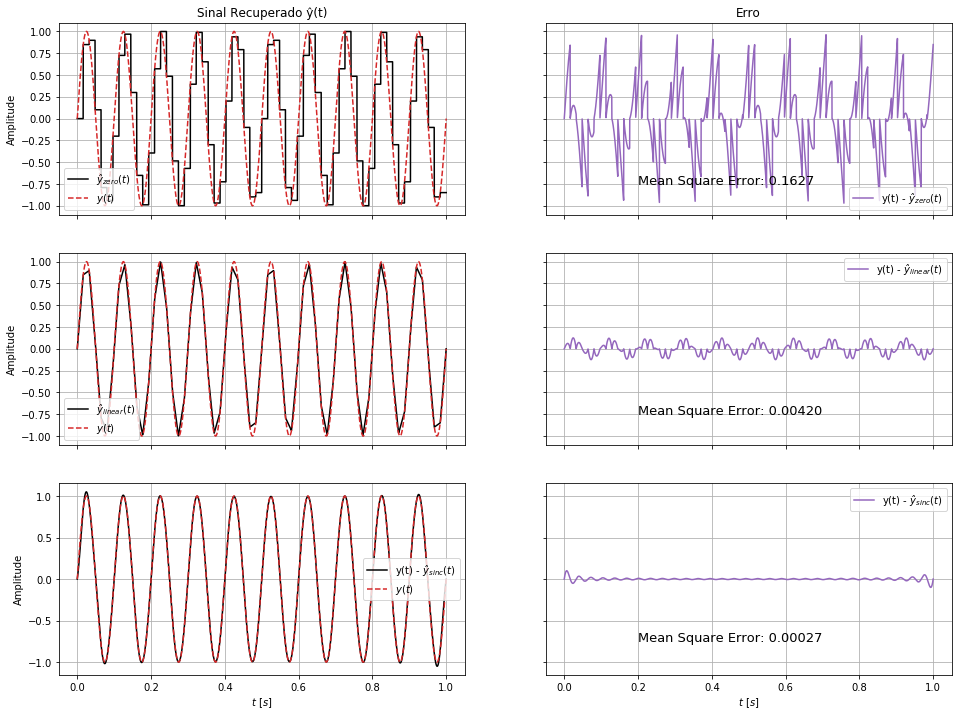

In [30]:
dim = 2.5*6.4 
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', num='results', figsize=[dim, 0.75*dim])

# Parâmetros do texto:
style = dict(size=13, color='black')

# Plots:
ax[0, 0].plot(time, signal_zero_ord, 'k-', label='$ŷ_{zero}(t)$')
ax[0, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[0, 0].grid()

ax[0, 1].plot(time, erro[0], 'C4-', label='y(t) - $ŷ_{zero}(t)$')
ax[0, 1].text(0.2, -0.75, 'Mean Square Error: {:.4f}'.format(mse[0]), **style)
ax[0, 1].grid()

ax[1, 0].plot(time, signal_linear, 'k-', label='$ŷ_{linear}(t)$')
ax[1, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[1, 0].grid()

ax[1, 1].plot(time, erro[1], 'C4-', label='y(t) - $ŷ_{linear}(t)$')
ax[1, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[1]), **style)
ax[1, 1].grid()

ax[2, 0].plot(time, signal_ideal, 'k-', label='y(t) - $ŷ_{sinc}(t)$')
ax[2, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[2, 0].grid()

ax[2, 1].plot(time, erro[2], 'C4-', label='y(t) - $ŷ_{sinc}(t)$')
ax[2, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[2]), **style)
ax[2, 1].grid()

# Textos e legendas:
ax[0, 0].set_title('Sinal Recuperado ŷ(t)')
ax[0, 1].set_title('Erro')

for i in range(3):
    ax[i, 0].set_ylabel('Amplitude')

ax[2, 0].set_xlabel('$t$ [$s$]')
ax[2, 1].set_xlabel('$t$ [$s$]')

ax[0, 0].legend(loc='lower left')
ax[1, 0].legend(loc='lower left')
ax[2, 0].legend(loc='best')
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()

plt.show('resuls')


In [7]:
whos

Variable            Type        Data/Info
-----------------------------------------
ax                  ndarray     3x2: 6 elems, type `object`, 48 bytes
dim                 float       16.0
display             function    <function display at 0x7f1451e57598>
erro                ndarray     3x3200: 9600 elems, type `float64`, 76800 bytes
fig                 Figure      Figure(1152x864)
freq                int         10
i                   int         2
mse                 ndarray     3: 3 elems, type `float64`, 24 bytes
np                  module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                 module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
rec_ideal_interp    function    <function rec_ideal_interp at 0x7f144c923ea0>
rec_linear_interp   function    <function rec_linear_interp at 0x7f14261d7510>
rec_zero_order      function    <function rec_zero_order at 0x7f14261d7620>
samp_signal         ndarray     12: 12 elems, type `float64`, 96

## Ideias trabalho...

tentativa de implementar tudo com base na interação ???? seria em cas cata pra casa vez que eu mudasse

 quantização ?

In [9]:
frequencias = 66
tempo = np.linspace(0, 1, 1600)
sinal_original = np.sin(20*np.pi*tempo)
erros = np.zeros((3, frequencias - 1))

for i in range(2, frequencias):
    
    tempo_amostragem = np.linspace(0, 1, i)
    sinal_amostrado = np.sin(20*np.pi*tempo_amostragem)
    
    # recupera
    zero_ord = rec_zero_order(sinal_amostrado, tempo)
    linear = rec_linear_interp(sinal_amostrado, tempo)
    ideal = rec_ideal_interp(sinal_amostrado, tempo)
    
    #erros
    erros[0, i - 1] = np.mean((sinal_original - zero_ord)**2)
    erros[1, i - 1] = np.mean((sinal_original - linear)**2)
    erros[2, i - 1] = np.mean((sinal_original - ideal)**2)


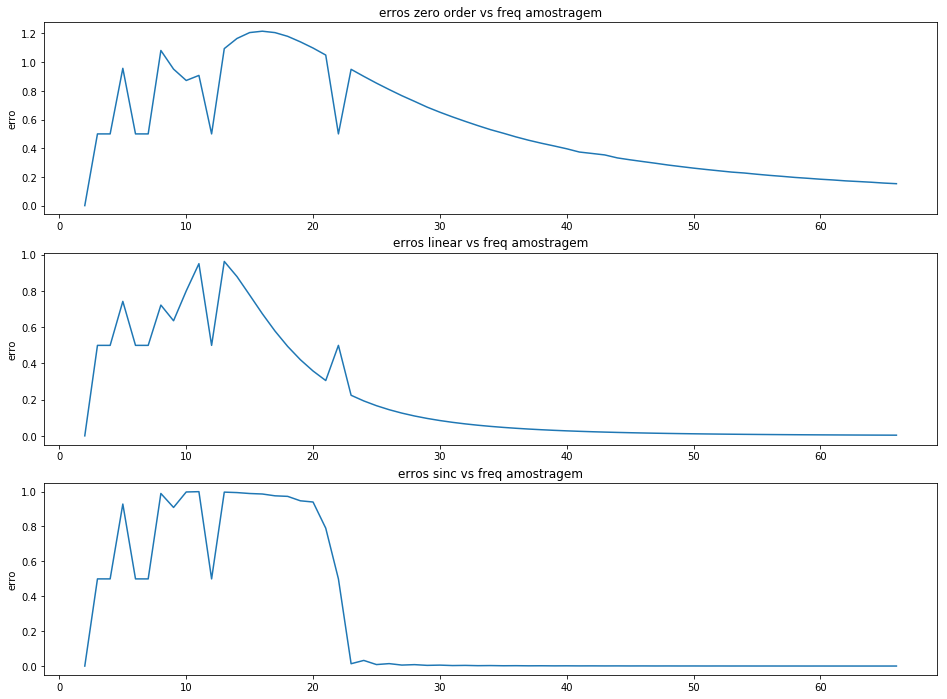

In [27]:
strtt = ['erros zero order vs freq amostragem', 
         'erros linear vs freq amostragem',
         'erros sinc vs freq amostragem']

plt.figure(figsize=[dim, dim*0.75])
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.title(strtt[i])
    plt.ylabel('erro')
    plt.plot(np.arange(2, 67), erros[i, :])

In [11]:
# TODO: Organizar

# explicar funcionamento...  https://en.wikipedia.org/wiki/Zero-order_hold
# explicar funcionamento...  http://fourier.eng.hmc.edu/e101/lectures/Sampling_theorem/node3.html

# linspace anda 10 deltas e amostra 11 vezes
# arange anda 11 deltas amostra 12 vezes
# n = 26
# print(np.arange(0, 1+1/n, 1/n)) 
# np.linspace(0, 1, n)


# import IPython.display as ipd
# ipd.Audio(0.001*np.sin(2*np.pi*10*time), rate=32000)

# teste
# dim = 1*6.4            # alargamento proporcional 
# l = 1                  # alargamento horizontal
# plt.figure('rec_signal_0', figsize=[dim*l, 0.75*dim])